<a href="https://colab.research.google.com/github/malskim1123/Project-2-CIS-2100/blob/main/Cis_2100_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd

In [94]:
path = "/content/drive/MyDrive/CIS 2100 proj 2/sales_records.csv"
df = pd.read_csv(path)
df.head()

,Date,Time,StoreID,CustomerID,OrderID,ProductName,Price
0,2024-11-10,18:10:40,888,844,1,Canon EOS Camera,$549.99
1,2024-11-10,18:10:40,888,844,1,Sony Headphone,$149.99
2,2024-11-10,18:10:40,888,844,1,Victus Laptop,$699.99
3,2024-02-11,18:10:40,863,476,2,Burton Snowboard,$599.99
4,2024-02-11,18:10:40,863,476,2,Burton Snowboard,$599.99


In [123]:
#Question 1: The most prevalent products, in customer baskets
most_prevalent_product = df['ProductName'].value_counts().head(1)

product_name = most_prevalent_product.index[0]
product_count = most_prevalent_product.values[0]

print(f"Most prevalent product is {product_name} with {product_count} sales.")

Most prevalent product is Ibanez Guitar with 3981 sales.


In [125]:
#Question 2: The frequency by which customers were large buyers, or filled up large baskets
order_product_count = df.groupby(['CustomerID', 'OrderID'])['ProductName'].nunique().reset_index()

large_basket_orders = order_product_count[order_product_count['ProductName'] >= 5]

top_5_customers = large_basket_orders['CustomerID'].value_counts().head(5)

print("Top 5 customers with large baskets (purchased 5 or more products):")
for customer, count in top_5_customers.items():
    print(f"CustomerID {customer} has {count} large baskets")

total_large_purchases = len(large_basket_orders)

print("\nTotal number of large baskets:", total_large_purchases)

Top 5 customers with large baskets (purchased 5 or more products):
CustomerID 604 has 12 large baskets
CustomerID 354 has 8 large baskets
CustomerID 132 has 8 large baskets
CustomerID 643 has 8 large baskets
CustomerID 512 has 7 large baskets

Total number of large baskets: 2577


In [117]:
#Question 3: Which stores contained the large-basket buyers, and by how much
# Too many stores with large baskets to list, so I showed top 5 stores with most baskets.
order_product_count = df.groupby(['CustomerID', 'OrderID'])['ProductName'].nunique().reset_index()

large_basket_orders = order_product_count[order_product_count['ProductName'] >= 5]

large_basket_orders = large_basket_orders.merge(df[['StoreID', 'OrderID']], on='OrderID')

store_large_basket_counts = large_basket_orders['StoreID'].value_counts()

total_stores_with_large_baskets = len(store_large_basket_counts)

print(f"Total number of stores that contained at least one large basket: {total_stores_with_large_baskets}")

print("\nTop 5 stores with the most filled-up baskets:")
for store_id, count in store_large_basket_counts.head(5).items():
    print(f"StoreID {store_id} had {count} large purchases")

Total number of stores that contained at least one large basket: 1588

Top 5 stores with the most filled-up baskets:
StoreID 420 had 37 large purchases
StoreID 1876 had 32 large purchases
StoreID 1444 had 32 large purchases
StoreID 1203 had 32 large purchases
StoreID 1180 had 31 large purchases


<Figure size 1000x600 with 0 Axes>

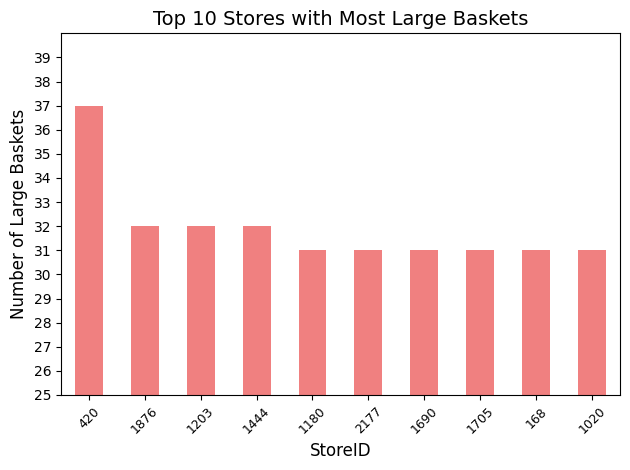

In [136]:
#Question 4: A visualization that ranks the top, large-basket customer stores, by frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
large_basket_by_store.plot(kind='bar', x='StoreID', y='Large Baskets', color='lightcoral', legend=False)

plt.title("Top 10 Stores with Most Large Baskets", fontsize=14)
plt.xlabel("StoreID", fontsize=12)
plt.ylabel("Number of Large Baskets", fontsize=12)

plt.ylim(25, 40)

plt.yticks(range(25, 40, 1))

plt.xticks(rotation=45, fontsize=9)

plt.tight_layout()
plt.show()

In [111]:
#Question 5: A top-n list of products, which were typical to customers in this demographic
df['ProductCount'] = df.groupby('OrderID')['ProductName'].transform('nunique')
large_basket_orders = df[df['ProductCount'] >= 5]

product_counts_in_large_baskets = large_basket_orders['ProductName'].value_counts()
top_n_products_large_basket = product_counts_in_large_baskets.head(5)

print("Top 5 products typical to large-basket customers:")

for rank, (product, count) in enumerate(top_n_products_large_basket.items(), start=1):
    print(f"{rank}. {product}, Sold {count} times")

Top 5 products typical to large-basket customers:
1. Ibanez Guitar, Sold 1486 times
2. Carpet, Sold 1470 times
3. Sony Headphone, Sold 1464 times
4. Canon EOS Camera, Sold 1457 times
5. Air Jordan 1, Sold 1445 times


In [119]:
#Question 6: A categorical approach to the above demographic – what is the categoric makeup of their baskets, on average?
category_map = {
    "Air Jordan 1": "Footwear",
    "Victus Laptop": "Electronics",
    "Sony Headphone": "Electronics",
    "Smith Ski Goggles": "Sports",
    "Ibanez Guitar": "Music",
    "Camille Rose Conditioner": "Beauty",
    "Whey Protein Powder": "Health",
    "Burton Snowboard": "Sports",
    "Nike Sweatpants": "Clothing",
    "Canon EOS Camera": "Electronics",
    "Carpet": "Home"
}

df['Category'] = df['ProductName'].map(category_map)
large_basket_orders = df[df['ProductCount'] == 5]
category_counts_in_large_baskets = large_basket_orders['Category'].value_counts()
top_5_categories_large_basket = category_counts_in_large_baskets.head(5)

print("Top 5 categories typical to large-basket customers:")
for i, (category, count) in enumerate(top_5_categories_large_basket.items(), start=1):
    print(f"{i}: {category}, Sold {count} times")

Top 5 categories typical to large-basket customers:
1: Electronics, Sold 2874 times
2: Sports, Sold 1892 times
3: Music, Sold 1001 times
4: Home, Sold 962 times
5: Footwear, Sold 961 times


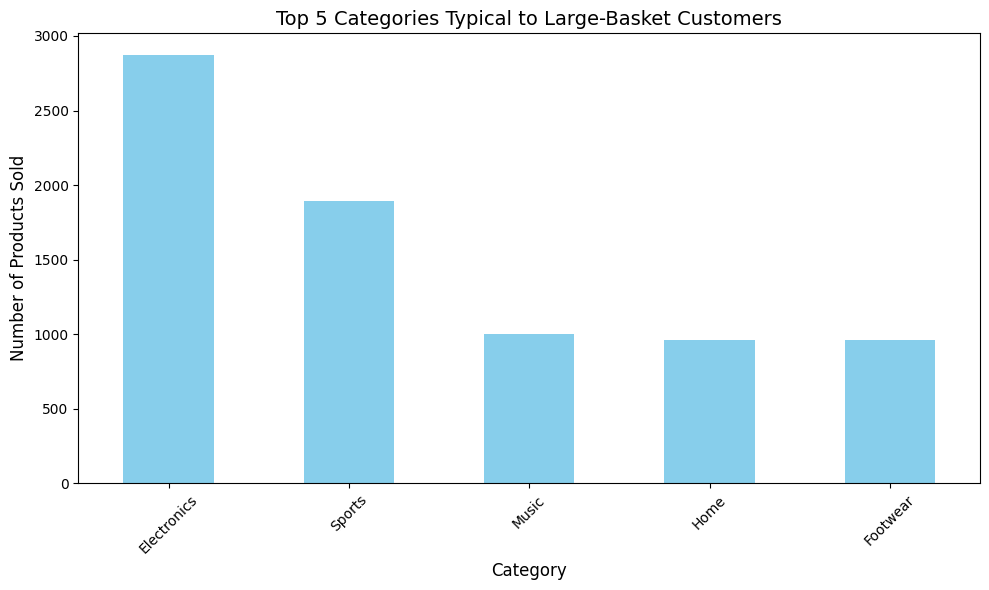

In [137]:
#Question 7: Formulate a visualization for item 6, above
import matplotlib.pyplot as plt

large_basket_orders = df[df['ProductCount'] == 5]

category_counts_in_large_baskets = large_basket_orders['Category'].value_counts()

top_5_categories_large_basket = category_counts_in_large_baskets.head(5)

plt.figure(figsize=(10, 6))
top_5_categories_large_basket.plot(kind='bar', color='skyblue')

plt.title("Top 5 Categories Typical to Large-Basket Customers", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Products Sold", fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
